# Visualizations

This script is for creating a word cloud out of the hashtags used from the gathering of Twitter data as well as other visualzizations. It's in a separate notebook because the other notebook was busy gathering data from Twitter. This is exactly why I chose a database to collect Tweets since it supports concurrency of read/write. This allows me to experiment with the data collected without stopping collection. There are other ways to go about this, but I wanted to learn the psycopg2 Python module and actually create a database. The code is not the prettiest because the timeframe was short, but it's functional and I learned along the way. 

### Import Modules

In [73]:
import pprint
import psycopg2
import time
from wordcloud import WordCloud
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from collections import Counter

### Database Connection Establishment

In [74]:
# Creates a connection to a database in Postgres (Local)
twitter_connection = psycopg2.connect(user = "tweet",
                                  password = "ggez",
                                  host = "127.0.0.1",
                                  port = "5433",
                                  database = "twitter")

# Needed for connection
cursor = twitter_connection.cursor()

# Print PostgreSQL Connection properties
print (twitter_connection.get_dsn_parameters(),"\n")

{'user': 'tweet', 'dbname': 'twitter', 'host': '127.0.0.1', 'port': '5433', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '1', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 



### Execute the query to fetch all hashtags

In [75]:
cursor.execute("SELECT t.hashtag FROM public.twitter_t t;")

Fetch a entry to make sure it worked

In [76]:
cursor.fetchone()

([],)

Now to Loop through the database to grab all the hashtags

In [116]:
# Execute the query from the twitter_t database
cursor.execute("SELECT t.hashtag FROM public.twitter_t t;")


# Keyword that was collected on Twitter that I want to filter out of the word cloud
keyword_list = ["eritrea","tplf ", 'tplf',"AbiyAhmed", 
                "isaiasafewerki ", "pfdj ","eprdf",
                "FreeEritrea ", "IStandWithEritrea ",
                "#istandwitheritrea ","#eritrea ",
                "handsofferitrea ", "#handsofferitrea ", 
                "abiyahmed","cyclinglife","roadcycling", 
                "eritelcyclingclub", "cycling", "halfmarathon"]

# Add hashtags to this
string_list = ""
hashtag_list = []

# Loop through the query
for i in cursor:
    
    # Only pass if the length of list is more than 0
    if len(i[0]) > 0:
        
        # if the hashtag list is 1, no loop is needed
        if len(i[0]) == 1:
            
            # Create a standard of text to compare against
            a = str(i[0][0]).lower().replace(" ","")
            
            # Hardcode to filter out the cycling hashtags
            if a == "cyclinglife" or a == "roadcycling" or a == "eritelcyclingclub" or a == "cycling" or a == "abiyahmed":
                continue
            else:    
                if a in keyword_list:
                    continue
                else:
                    string_list += " " + a
                    hashtag_list.append(a)
                
        # Loops through the list of each hashtag for that tweet
        for j in i[0]:

            # Create a standard of text to compare against
            j = j.lower().replace(" ","")

            # Had trouble with this guys name being filtered for some reason
            if j in keyword_list:
                continue
            else:
                string_list += " " + str(j)
                hashtag_list.append(j)



In [117]:
count_hashtags = Counter(hashtag_list)
count_hashtags

Counter({'humanrights': 24,
         'ngo': 5,
         'amnestyinternational': 5,
         'african': 4,
         'neocolonialist': 4,
         'habesha': 12,
         'ethiopia': 533,
         'love': 1,
         'eriethio': 1,
         'tigrai': 3,
         'eplfhgdefvision': 5,
         'german': 34,
         'eritreans': 15,
         'ethiopian': 20,
         'africa': 104,
         'germany': 67,
         'freedawit': 2,
         'jornalismnotcrime': 2,
         'ኤርትራ': 3,
         'ኢትዮጵያ': 1,
         'croatia': 6,
         'cuba': 7,
         'cyprus': 6,
         'kunama': 1,
         'tigray': 17,
         'karo': 1,
         'hoa': 40,
         'dawit': 6,
         'swedish': 6,
         'freedawitisaak': 8,
         'travel': 16,
         'chemnitz': 6,
         'eu': 7,
         'redsea': 7,
         'peace': 3,
         'humanitarianism': 1,
         'unsc': 9,
         'eri': 1,
         'un': 6,
         'thisisamerica': 2,
         'yemen': 7,
         'turvapaikanhaki

## Create a Word Cloud

This cell creates a word cloud out of my giant string of hashtags. I originally tried a list, but the word cloud module in Python prefers a text file or string. Since I collected on all languages that had the keywords present, there are different hashtags in languages that I'm unsure how to handle at the moment. They are represented in [] format similar to when your phone/computer doesn't recognize emojis. 

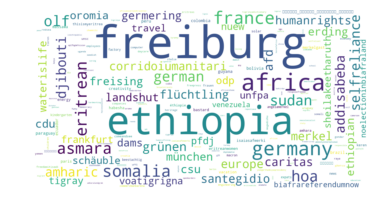

In [111]:
# Help was sought from the documentation of the wordcloud Python Module examples.
wordcloud = WordCloud(background_color="white",width=1500, height=800,max_font_size=200,collocations=False, random_state=1).generate(string_list)

# Save to file
wordcloud.to_file("wordcloud.png")

# Plot the figure
plt.figure()

# Show the figure in the color scheme
plt.imshow(wordcloud, interpolation="bilinear")

# Turn axis off
plt.axis("off")

# Show word cloud
plt.show()

## More Visualizations

It's hard to know when your efforts are over in this lab, but I felt like I could do more since I was too constrained on time to investigate each individual's tweets. I also learned that a max of 3,200 tweets could be returned for a single user. This may cause problems with people who tweet a lot. For reference the average status count was 22,699 at one point (Over 2,700 Tweets) during the collection.

Select Tweet Date and count how many tweets were collected each day. 

In [112]:
# Execute the query from the twitter_t database
cursor.execute("SELECT t.screen_name, t.time FROM public.twitter_t t;")


# Blank dictionary creation
date_dict = {}

# Loop through the collected rows
for row in cursor:
    
    # Variable collection
    month = time.localtime(row[1]).tm_mon
    day = time.localtime(row[1]).tm_mday
    year = time.localtime(row[1]).tm_year

    # Value for dictionary key (Raw Lists are unhashable)
    date = str([month, day, year])

    # Check to see if the entry exists in the dictionary
    if date in date_dict:
        date_dict[date] += 1

    # If not, create the key
    else:
        date_dict[date] = 1

        
date_dict

{'[10, 27, 2018]': 216,
 '[10, 29, 2018]': 1095,
 '[10, 30, 2018]': 2410,
 '[10, 28, 2018]': 502,
 '[10, 31, 2018]': 894}

Convert the dictionary to a lists of x,y to plot.

In [113]:
x = []
y = []

# Loop through the dictionary to create new lists
for g in date_dict:
    x.append(g)
    y.append(date_dict[g])
    
print(x,"\n",y)

['[10, 27, 2018]', '[10, 29, 2018]', '[10, 30, 2018]', '[10, 28, 2018]', '[10, 31, 2018]'] 
 [216, 1095, 2410, 502, 894]


Reorder List so the days are sequential. .sort() did not seem to work with a string of a list. 

In [114]:
# The order you want 
myorder = [0,3,1,2,4]


x = [x[i] for i in myorder]
y = [y[i] for i in myorder]

print(x,y)

['[10, 27, 2018]', '[10, 28, 2018]', '[10, 29, 2018]', '[10, 30, 2018]', '[10, 31, 2018]'] [216, 502, 1095, 2410, 894]


Plot the 

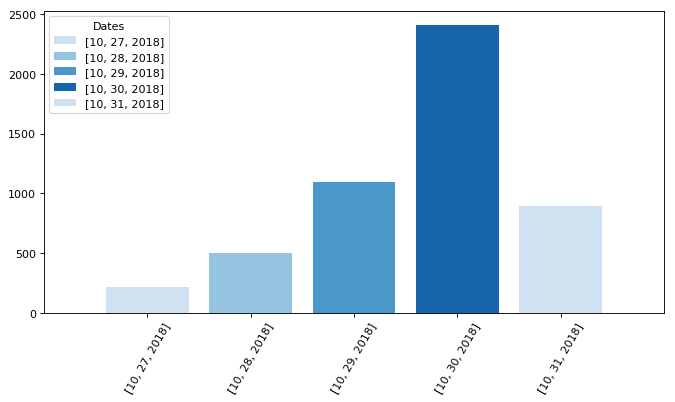

In [115]:
x = x
y = y

# Figure size
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='red')

# Rotation of tick marks on x-axis
plt.xticks(rotation = 60)

# X-lim for x-axis
plt.xlim(-1,5)

# Plot with a specific color pallete
fig = plt.bar(x, y, color=sns.color_palette("Blues",4))

# Create a legend
plt.legend(fig, x, loc = "upper left", title = "Dates")

# Show plot
plt.show()

### Number of Unique Users

This could have been done easier in PgAdmin, but I wanted to see if there was a good way to do it with Psycopg2.

In [118]:
# Execute the query from the twitter_t database
cursor.execute("SELECT DISTINCT(t.screen_name) FROM public.twitter_t t;")
unique_user = []

for row in cursor:
    unique_user.append(row[0])
    
print("There are",len(unique_user),"unique users tweeting about these keywords in the past several days")

There are 2838 unique users tweeting about these keywords in the past several days
